In [1]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 653 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import csv
import os
import pytz
from datetime import datetime, timedelta

#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.compat.v1 import set_random_seed

#from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LinearRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from keras.callbacks import EarlyStopping
import tensorflow as tf
from keras. utils.vis_utils import plot_model

from statsmodels.tsa.arima_model import ARIMA
import math
from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# SQL Alchemy
from sqlalchemy import create_engine
#from config import username, password

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

In [3]:
start = "2010-01-01"
ticker = "META"

In [4]:
import yfinance as yf
data_DF = yf.download(ticker, start = start, period = "ytd")

[*********************100%***********************]  1 of 1 completed


In [5]:
data_DF.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [6]:
data_DF = data_DF.reset_index(level=0)

In [7]:
data_DF

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200
...,...,...,...,...,...,...,...
2644,2022-11-18,113.800003,114.320000,110.620003,112.050003,112.050003,33340900
2645,2022-11-21,111.519997,112.370003,109.190002,109.860001,109.860001,24351100
2646,2022-11-22,109.860001,111.620003,108.320000,111.440002,111.440002,29029000
2647,2022-11-23,111.720001,112.669998,110.730003,112.239998,112.239998,21343100


In [8]:
print(len(data_DF))

2649


In [9]:
df_ticker= data_DF.drop_duplicates()
print(df_ticker.count())

Date         2649
Open         2649
High         2649
Low          2649
Close        2649
Adj Close    2649
Volume       2649
dtype: int64


In [10]:
# Rename the columns
df_ticker = df_ticker.rename(columns={
'Date': 'Date',  
'Open': 'open',
'High': 'high',
'Low': 'low',
'Close': 'close',
'Adj Close': 'adjclose',
'Volume': 'volume'
})

In [11]:
df_ticker.dtypes

Date        datetime64[ns]
open               float64
high               float64
low                float64
close              float64
adjclose           float64
volume               int64
dtype: object

In [12]:
print('Number of rows and columns: ', df_ticker.shape)
print(df_ticker.head())
print("checking if any null values are present\n", df_ticker.isna().sum())

Number of rows and columns:  (2649, 7)
        Date       open       high        low      close   adjclose     volume
0 2012-05-18  42.049999  45.000000  38.000000  38.230000  38.230000  573576400
1 2012-05-21  36.529999  36.660000  33.000000  34.029999  34.029999  168192700
2 2012-05-22  32.610001  33.590000  30.940001  31.000000  31.000000  101786600
3 2012-05-23  31.370001  32.500000  31.360001  32.000000  32.000000   73600000
4 2012-05-24  32.950001  33.209999  31.770000  33.029999  33.029999   50237200
checking if any null values are present
 Date        0
open        0
high        0
low         0
close       0
adjclose    0
volume      0
dtype: int64


In [13]:
df_ticker.to_csv(f'/content/{ticker}.csv', sep=',', index=True)

Loading ticker data to sqlite stocks database

In [14]:
# Create Engine for project4 data
import sqlite3 as sl
conn=create_engine("sqlite:////content/stocks.db")

In [15]:
#uploading to respecive tables in project2 database
df_ticker.to_sql(ticker, con=conn, if_exists='replace', index=False)

In [16]:
df_ticker = df_ticker.set_index('Date')

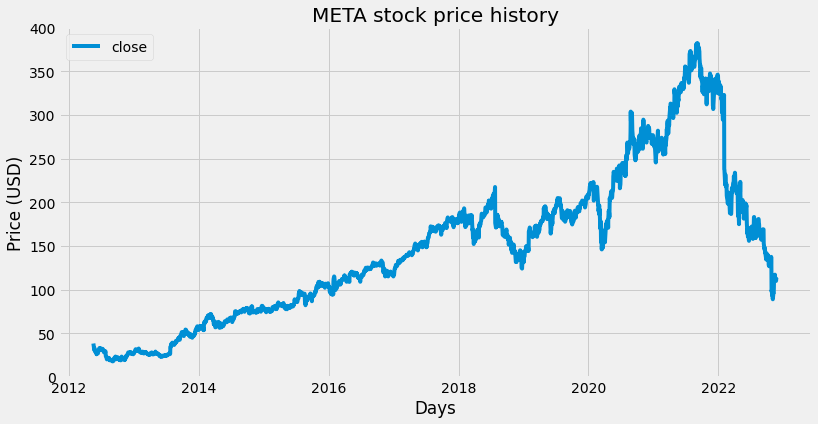

In [17]:
plt.figure(figsize = (12,6))
plt.plot(df_ticker["close"])
title_name = ticker+ ' stock price history'
plt.title(title_name)
plt.ylabel('Price (USD)')
plt.xlabel('Days')
plt.legend(['close'], loc='upper left')
plt.savefig('stock_price_close.png')
plt.show()

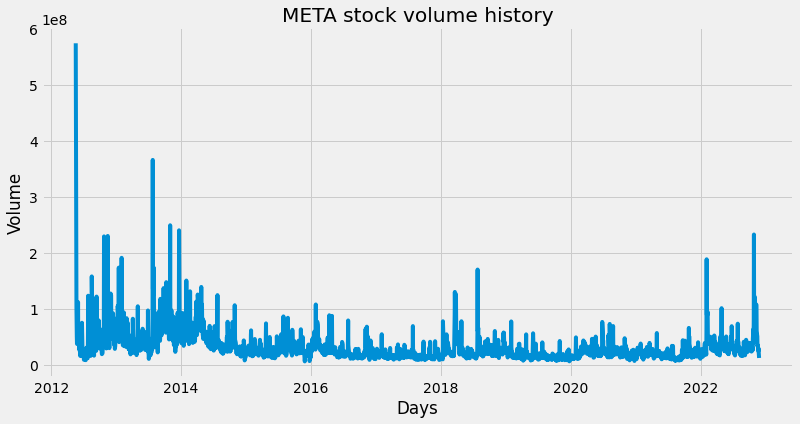

In [18]:
plt.figure(figsize = (12,6))
plt.plot(df_ticker["volume"])
title_name = ticker+ ' stock volume history'
plt.title(title_name)
plt.ylabel('Volume')
plt.xlabel('Days')
plt.savefig('stock_volume.png')
plt.show()

#Linear Regression

In [120]:
#Keep only the close data
df=df_ticker[['close']]
df=df.dropna()

In [121]:
df['S_3'] = df['close'].shift(1).rolling(window=3).mean() 
df['S_9']= df['close'].shift(1).rolling(window=9).mean() 
df= df.dropna() 
X = df[['S_3','S_9']] 
X.head()

,S_3,S_9
Date,,
2012-06-01,28.876667,31.870000
2012-06-04,28.503333,30.702222
2012-06-05,28.073333,29.910000
2012-06-06,26.830000,29.340000
2012-06-07,26.526667,28.763333


In [122]:
y = df['close']
y.head()

Date
2012-06-01    27.719999
2012-06-04    26.900000
2012-06-05    25.870001
2012-06-06    26.809999
2012-06-07    26.309999
Name: close, dtype: float64

In [123]:
#Split the data into train and test dataset
t=.8 
t = int(t*len(df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

In [127]:
#Create a linear regression model and fit the data
linear = LinearRegression().fit(X_train,y_train)


In [128]:
X_test

,S_3,S_9
Date,,
2020-10-29,276.023336,273.844445
2020-10-30,277.263336,275.500000
2020-11-02,270.536662,275.689999
2020-11-03,268.433319,275.001109
2020-11-04,263.256653,273.508884
...,...,...
2022-11-29,111.410004,111.611113
2022-11-30,111.410004,111.408891
2022-12-01,111.410004,111.404447


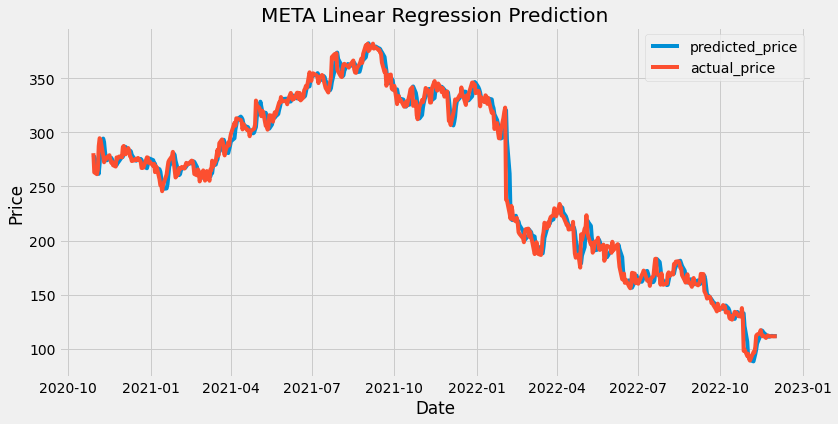

In [130]:
#Prediction using test data
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(12,6))  
y_test.plot()
title_reg = ticker+ ' Linear Regression Prediction'
plt.title(title_reg)  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("Price")  
plt.show()

In [131]:
#show the scores for test and train data predictions
from sklearn.metrics import r2_score
r2_score(y_test,predicted_price)

0.9874721733016206

In [132]:
df=df.reset_index()
df

,Date,close,S_3,S_9
0,2012-06-01,27.719999,28.876667,31.870000
1,2012-06-04,26.900000,28.503333,30.702222
2,2012-06-05,25.870001,28.073333,29.910000
3,2012-06-06,26.809999,26.830000,29.340000
4,2012-06-07,26.309999,26.526667,28.763333
...,...,...,...,...
2642,2022-11-29,111.410004,111.410004,111.611113
2643,2022-11-30,111.410004,111.410004,111.408891
2644,2022-12-01,111.410004,111.410004,111.404447
2645,2022-12-02,111.410004,111.410004,111.333336


In [133]:
## Add a dummy row at the end. This will not be used to predict. 
useast = datetime.now(pytz.timezone('America/New_York'))
useast = useast.strftime('%Y-%m-%d')
useast = datetime.strptime(useast, '%Y-%m-%d')
first_forecast_date = useast +timedelta(1)
print(first_forecast_date.date())

2022-11-27


In [ ]:
#loop to add seven rows of dummy data
for i in range(7):
    df.loc[len(df)]=df.loc[len(df)-1]
    next_day = useast +timedelta(i+1)
    df.iloc[-1, df.columns.get_loc('Date')] = next_day
    df['Date'] = pd.to_datetime(df["Date"], utc=True).dt.date

In [135]:
df.tail(10)

,Date,close,S_3,S_9
2637,2022-11-22,111.440002,111.120000,111.583334
2638,2022-11-23,112.239998,111.116669,112.691112
2639,2022-11-25,111.410004,111.180000,112.732223
2640,2022-11-27,111.410004,111.696668,112.553335
2641,2022-11-28,111.410004,111.686668,112.241113
2642,2022-11-29,111.410004,111.410004,111.611113
2643,2022-11-30,111.410004,111.410004,111.408891
2644,2022-12-01,111.410004,111.410004,111.404447
2645,2022-12-02,111.410004,111.410004,111.333336
2646,2022-12-03,111.410004,111.410004,111.505558


In [136]:
df = df.set_index('Date')

In [140]:
x_today=df.iloc[-7:]
x_today=x_today[['S_3','S_9']]
x_today

,S_3,S_9
Date,,
2022-11-27,111.696668,112.553335
2022-11-28,111.686668,112.241113
2022-11-29,111.410004,111.611113
2022-11-30,111.410004,111.408891
2022-12-01,111.410004,111.404447
2022-12-02,111.410004,111.333336
2022-12-03,111.410004,111.505558


In [141]:
#predict tomorrows price
new_price = linear.predict(x_today)
new_price

array([111.72999759, 111.77022826, 111.55233407, 111.58594287,
       111.5866814 , 111.59849987, 111.56987693])

In [143]:
reg_forecast = pd.DataFrame(new_price,index=x_today.index,columns = ['forecast'])
reg_forecast  

,forecast
Date,
2022-11-27,111.729998
2022-11-28,111.770228
2022-11-29,111.552334
2022-11-30,111.585943
2022-12-01,111.586681
2022-12-02,111.598500
2022-12-03,111.569877


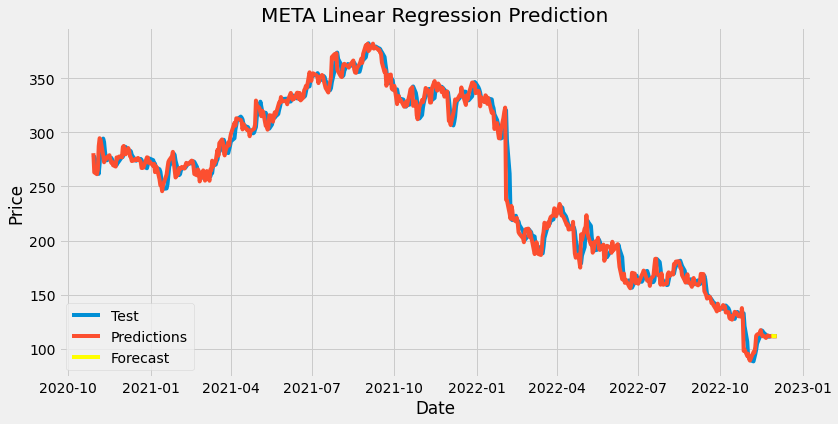

In [149]:
#Prediction using test data
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(12,6))  
y_test.plot()
title_reg = ticker+ ' Linear Regression Prediction'
plt.title(title_reg)  
plt.plot(reg_forecast['forecast'], color='Yellow') 
plt.ylabel("Price")
plt.legend(['Test', 'Predictions', 'Forecast'], loc='lower left')  
plt.show()

#LSTM - Method - 1

In [19]:
df_ticker = df_ticker.reset_index(level=0)

In [20]:
df_ticker.head(5)

,Date,open,high,low,close,adjclose,volume
0,2012-05-18,42.049999,45.000000,38.000000,38.230000,38.230000,573576400
1,2012-05-21,36.529999,36.660000,33.000000,34.029999,34.029999,168192700
2,2012-05-22,32.610001,33.590000,30.940001,31.000000,31.000000,101786600
3,2012-05-23,31.370001,32.500000,31.360001,32.000000,32.000000,73600000
4,2012-05-24,32.950001,33.209999,31.770000,33.029999,33.029999,50237200


In [21]:
## Add a dummy row at the end. This will not be used to predict. 
useast = datetime.now(pytz.timezone('America/New_York'))
useast = useast.strftime('%Y-%m-%d')
useast = datetime.strptime(useast, '%Y-%m-%d')
first_forecast_date = useast +timedelta(1)
print(first_forecast_date.date())

2022-11-27


In [22]:
#loop to add seven rows of dummy data
for i in range(7):
    df_ticker.loc[len(df_ticker)]=df_ticker.loc[len(df_ticker)-1]
    next_day = useast +timedelta(i+1)
    df_ticker.iloc[-1, df_ticker.columns.get_loc('Date')] = next_day
    df_ticker['Date'] = pd.to_datetime(df_ticker["Date"], utc=True).dt.date

In [23]:
df_ticker.tail(10)

,Date,open,high,low,close,adjclose,volume
2646,2022-11-22,109.860001,111.620003,108.320000,111.440002,111.440002,29029000
2647,2022-11-23,111.720001,112.669998,110.730003,112.239998,112.239998,21343100
2648,2022-11-25,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2649,2022-11-27,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2650,2022-11-28,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2651,2022-11-29,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2652,2022-11-30,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2653,2022-12-01,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2654,2022-12-02,111.300003,112.730003,111.019997,111.410004,111.410004,12007600
2655,2022-12-03,111.300003,112.730003,111.019997,111.410004,111.410004,12007600


In [24]:
df_ticker = df_ticker.set_index('Date')

In [25]:
#Set Target Variable
output_var = pd.DataFrame(df_ticker["adjclose"],index=df_ticker.index)
#Selecting the Features
features = ['open', 'high', 'low', 'volume']

In [26]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df_ticker[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df_ticker.index)
feature_transform.tail()

,open,high,low,volume
Date,,,,
2022-11-29,0.256381,0.258045,0.258733,0.010736
2022-11-30,0.256381,0.258045,0.258733,0.010736
2022-12-01,0.256381,0.258045,0.258733,0.010736
2022-12-02,0.256381,0.258045,0.258733,0.010736
2022-12-03,0.256381,0.258045,0.258733,0.010736


#Splitting to Training set and Test set
The sci-kit-learn library’s TimeSeriesSplit class will be used for this. We set the number of splits to 10, indicating that 10% of the data will be used as the test set and 90% of the data would be used to train the LSTM model. The advantage of utilising this Time Series split is that the split time series data samples are examined at regular time intervals.

In [27]:
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
       # y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()
        y_train, y_test = output_var[:len(train_index)], output_var[len(train_index): (len(train_index)+len(test_index))]

In [28]:
y_test

,adjclose
Date,
2021-12-22,330.450012
2021-12-23,335.239990
2021-12-27,346.179993
2021-12-28,346.220001
2021-12-29,342.940002
...,...
2022-11-29,111.410004
2022-11-30,111.410004
2022-12-01,111.410004


As the LSTM needs that the data to be provided in the 3D form, we first transform the training and test data to NumPy arrays and then restructure them to match into the format (Number of Samples, 1, Number of Features). 

In [29]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [30]:
X_train

array([[[0.06592409, 0.07302082, 0.05660743, 1.        ]],

       [[0.05074257, 0.05023767, 0.04276698, 0.28587298]],

       [[0.0399615 , 0.04185106, 0.03706472, 0.16889149]],

       ...,

       [[0.86556654, 0.87100475, 0.86696563, 0.06006994]],

       [[0.85726074, 0.85130854, 0.84421193, 0.02111939]],

       [[0.84799233, 0.8679725 , 0.847589  , 0.01797492]]])

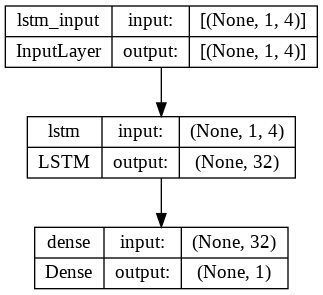

In [31]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [32]:
print('Number of rows and columns: ', X_train.shape)

Number of rows and columns:  (2415, 1, 4)


# Training the Stock Market Prediction Model

In [33]:
# Fitting the Training set
history= lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
302/302 [==============================] - 3s 4ms/step - loss: 25723.2656
Epoch 2/100
302/302 [==============================] - 1s 3ms/step - loss: 20009.9863
Epoch 3/100
302/302 [==============================] - 1s 2ms/step - loss: 13033.1621
Epoch 4/100
302/302 [==============================] - 1s 2ms/step - loss: 6938.5381
Epoch 5/100
302/302 [==============================] - 1s 2ms/step - loss: 3140.6111
Epoch 6/100
302/302 [==============================] - 1s 3ms/step - loss: 1420.5924
Epoch 7/100
302/302 [==============================] - 1s 2ms/step - loss: 850.7808
Epoch 8/100
302/302 [==============================] - 1s 2ms/step - loss: 658.8868
Epoch 9/100
302/302 [==============================] - 1s 2ms/step - loss: 518.0996
Epoch 10/100
302/302 [==============================] - 1s 2ms/step - loss: 378.2470
Epoch 11/100
302/302 [==============================] - 1s 2ms/step - loss: 249.1210
Epoch 12/100
302/302 [==============================] - 1s 2ms/st

In [34]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

8/8 [==============================] - 0s 2ms/step


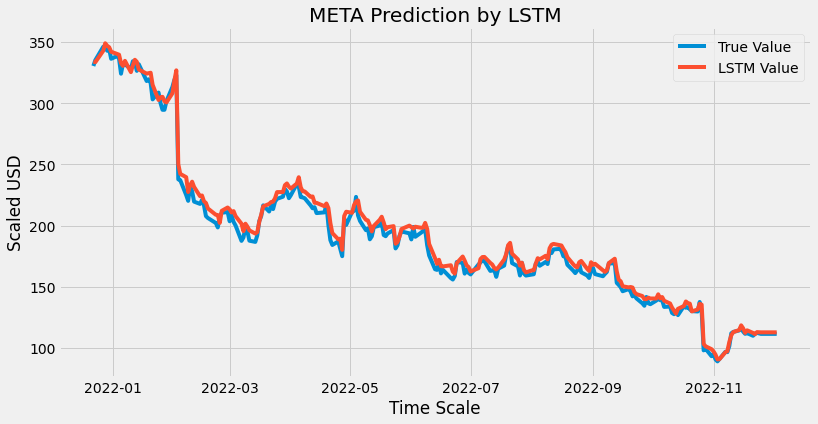

In [35]:
#Predicted vs True Adj Close Value – LSTM
predicted_df = pd.DataFrame(y_test)
predicted_df['predictions'] = y_pred
plt.figure(figsize = (12,6))
plt.plot(predicted_df['adjclose'], label='True Value')
plt.plot(predicted_df['predictions'], label='LSTM Value')
title_name2 = ticker+ ' Prediction by LSTM'
plt.title(title_name2)
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.savefig('LSTM_Predicted_Vs_AdjClose_Method_1.png')
plt.show()

In [40]:
predicted_df.tail(10)

,adjclose,predictions
Date,,
2022-11-22,111.440002,111.143990
2022-11-23,112.239998,112.864265
2022-11-25,111.410004,112.669945
2022-11-27,111.410004,112.669945
2022-11-28,111.410004,112.669945
2022-11-29,111.410004,112.669945
2022-11-30,111.410004,112.669945
2022-12-01,111.410004,112.669945
2022-12-02,111.410004,112.669945


In [ ]:
print("R2 score - LSTM Method-1 : %.2f" % r2_score(y_test,y_pred))

In [46]:
lstm.save("LSTM_Method_1.h5")

#LSTM - Method-2

In [47]:
# Create a dataframe with only the Close Stock Price Column
data_target = df_ticker.filter(['close'])

# Convert the dataframe to a numpy array to train the LSTM model
target = data_target.values

# Splitting the dataset into training and test
# Target Variable: Close stock price value

training_data_len = int(len(target)* 0.75) # training set has 75% of the data
training_data_len

# Normalizing data before model fitting using MinMaxScaler
# Feature Scaling

sc = MinMaxScaler(feature_range=(0,1))
training_scaled_data = sc.fit_transform(target)
training_scaled_data

array([[0.05624914],
       [0.04472493],
       [0.03641103],
       ...,
       [0.25704488],
       [0.25704488],
       [0.25704488]])

In [48]:
# Create a training dataset containing the last 180-day closing price values we want to use to estimate the 181st closing price value.
train_data = training_scaled_data[0:training_data_len  , : ]

X_train = []
y_train = []
for i in range(180, len(train_data)):
    X_train.append(train_data[i-180:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train) # converting into numpy sequences to train the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print('Number of rows and columns: ', X_train.shape)  #(1806 values, 180 time-steps, 1 output)

Number of rows and columns:  (1812, 180, 1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 180, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 180, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 180, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 180, 50)           0         
                                                                 
 lstm_3 (LSTM)               (None, 180, 50)           20200     
                                                                 
 dropout_2 (Dropout)         (None, 180, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 50)               

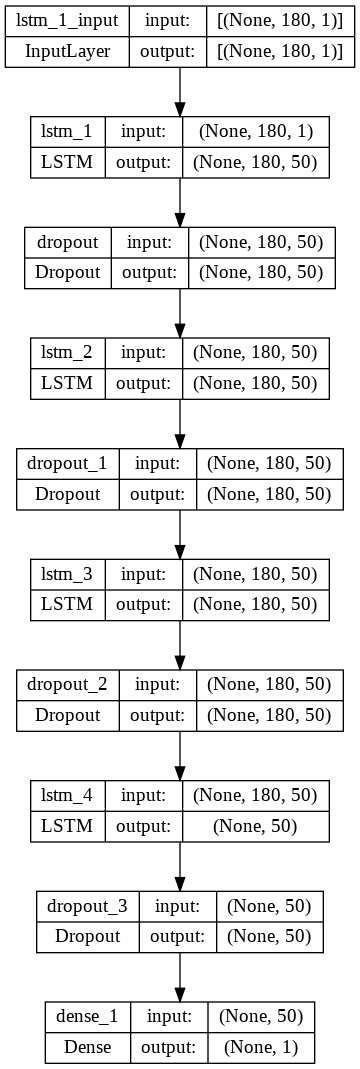

In [49]:
# We add the LSTM layer and later add a few Dropout layers to prevent overfitting.
# Building a LTSM model with 50 neurons and 4 hidden layers. We add the LSTM layer with the following arguments:
# 50 units which is the dimensionality of the output space
# return_sequences=True which determines whether to return the last output in the output sequence, or the full sequence input_shape as the shape of our training set.
# When defining the Dropout layers, we specify 0.2, meaning that 20% of the layers will be dropped.
# Thereafter, we add the Dense layer that specifies the output of 1 unit.
# After this, we compile our model using the popular adam optimizer and set the loss as the mean_squarred_error.

model = Sequential()

#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Reporting the number of parameters
print(model.summary())
    
num_params = model.count_params()
print('Number of parameters: {}'.format(num_params))
plot_model(model, show_shapes=True, show_layer_names=True)

In [50]:
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
57/57 [==============================] - 27s 348ms/step - loss: 0.0087
Epoch 2/100
57/57 [==============================] - 20s 347ms/step - loss: 0.0014
Epoch 3/100
57/57 [==============================] - 20s 353ms/step - loss: 0.0015
Epoch 4/100
57/57 [==============================] - 20s 351ms/step - loss: 0.0015
Epoch 5/100
57/57 [==============================] - 20s 352ms/step - loss: 0.0013
Epoch 6/100
57/57 [==============================] - 21s 373ms/step - loss: 0.0012
Epoch 7/100
57/57 [==============================] - 20s 353ms/step - loss: 0.0011
Epoch 8/100
57/57 [==============================] - 20s 348ms/step - loss: 0.0010
Epoch 9/100
57/57 [==============================] - 20s 355ms/step - loss: 0.0011
Epoch 10/100
57/57 [==============================] - 20s 350ms/step - loss: 0.0010
Epoch 11/100
57/57 [==============================] - 20s 347ms/step - loss: 0.0010
Epoch 12/100
57/57 [==============================] - 20s 352ms/step - loss: 9.4491e-

In [51]:
# Getting the predicted stock price
test_data = training_scaled_data[training_data_len - 180: , : ]

#Create the x_test and y_test data sets
X_test = []
y_test =  target[training_data_len : , : ]
for i in range(180,len(test_data)):
    X_test.append(test_data[i-180:i,0])

# Convert x_test to a numpy array
X_test = np.array(X_test)

#Reshape the data into the shape accepted by the LSTM
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
print('Number of rows and columns: ', X_test.shape)

Number of rows and columns:  (664, 180, 1)


In [63]:
# Making predictions using the test dataset
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

21/21 [==============================] - 2s 84ms/step


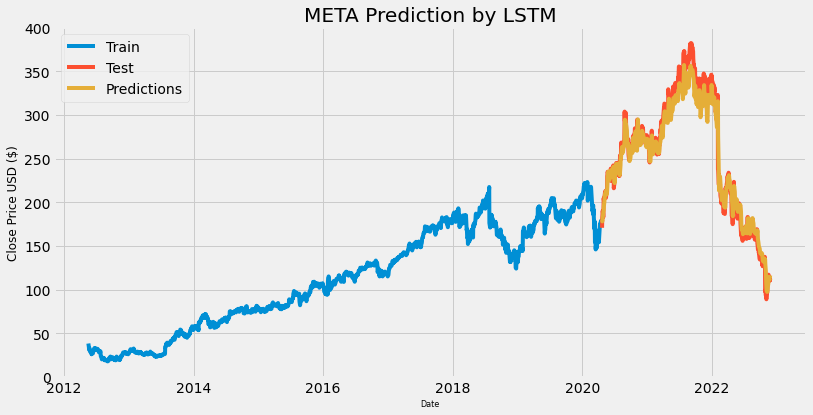

In [114]:
# Visualising the results
train = data_target[:training_data_len]
predicted_DF2 = data_target[training_data_len:]
predicted_DF2['predictions'] = predicted_stock_price
plt.figure(figsize = (12,6))
title_name3 = ticker+ ' Prediction by LSTM'
plt.title(title_name3)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(train['close'])
plt.plot(predicted_DF2[['close', 'predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='Top left')
plt.show()

In [89]:
predicted_DF2.tail(10)

,close,predictions
Date,,
2022-11-22,111.440002,112.938507
2022-11-23,112.239998,112.360550
2022-11-25,111.410004,112.415504
2022-11-27,111.410004,112.805023
2022-11-28,111.410004,113.245071
2022-11-29,111.410004,113.578529
2022-11-30,111.410004,113.760284
2022-12-01,111.410004,113.812080
2022-12-02,111.410004,113.781227


In [96]:
predicted_DF2 = predicted_DF2.reset_index(level=0)

In [115]:
predicted_DF2.tail(10)

,close,predictions
Date,,
2022-11-22,111.440002,112.938507
2022-11-23,112.239998,112.360550
2022-11-25,111.410004,112.415504
2022-11-27,111.410004,112.805023
2022-11-28,111.410004,113.245071
2022-11-29,111.410004,113.578529
2022-11-30,111.410004,113.760284
2022-12-01,111.410004,113.812080
2022-12-02,111.410004,113.781227


In [98]:
#filtering the forecasted stock price for the next 7 future days
filtered_df = predicted_DF2.loc[(predicted_DF2['Date'] >= first_forecast_date.date())]

In [99]:
filtered_df = filtered_df.set_index('Date')

In [100]:
filtered_df

,close,predictions
Date,,
2022-11-27,111.410004,112.805023
2022-11-28,111.410004,113.245071
2022-11-29,111.410004,113.578529
2022-11-30,111.410004,113.760284
2022-12-01,111.410004,113.812080
2022-12-02,111.410004,113.781227
2022-12-03,111.410004,113.713921


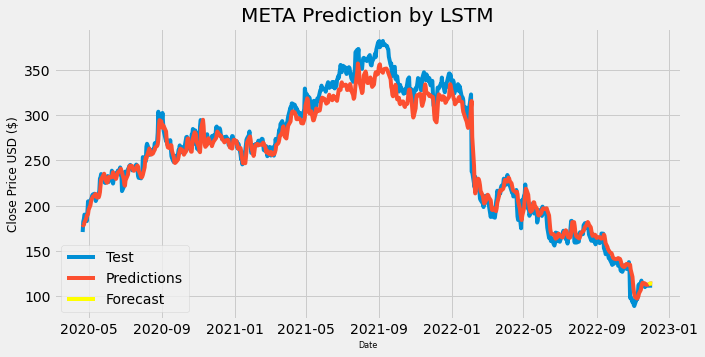

In [105]:
# Visualising the results
train = data_target[:training_data_len]
predicted_DF2 = data_target[training_data_len:]
predicted_DF2['predictions'] = predicted_stock_price
plt.figure(figsize=(10,5))
title_name2 = ticker+ ' Prediction by LSTM'
plt.title(title_name2)
plt.xlabel('Date', fontsize=8)
plt.ylabel('Close Price USD ($)', fontsize=12)
plt.plot(predicted_DF2[['close', 'predictions']])
plt.plot(filtered_df['predictions'], color='Yellow')
plt.legend(['Test', 'Predictions', 'Forecast'], loc='lower left')
plt.show()

In [116]:
#R2 score
print("R2 score for LSTM - Method_2 : %.2f" % r2_score(y_test,predicted_stock_price))

R2 score for LSTM - Method_2 : 0.97


In [106]:
#save models
model.save("LSTM_Method_2.h5")

# Stock price prediction - ARIMA model
 

In [152]:
#from statsmodels.tsa.arima_model import ARIMA
#from math import sqrt

#import math
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [81]:
#**************** FUNCTIONS TO FETCH DATA ***************************
def get_historical(quote):
   start = "2010-01-01"
   ticker = quote
   import yfinance as yf
   data = yf.download(ticker, start = start, period = "ytd")
   data = data.reset_index(level=0)
   df_ticker= data.drop_duplicates()
   df_ticker= df_ticker.dropna()
   df_ticker = df_ticker.rename(columns={
      'Date': 'Date',  
      'Open': 'open',
      'High': 'high',
      'Low': 'low',
      'Close': 'close',
      'Adj Close': 'adjclose',
      'Volume': 'volume'
      })
   df_ticker.to_csv(f'/content/{ticker}.csv', sep=',', index=True)
   
   # Create Engine for project4 data
   import sqlite3 as sl
   conn=create_engine("sqlite:////content/stocks.db")

   #uploading to respecive tables in project2 database
   df_ticker.to_sql(ticker, con=conn, if_exists='replace', index=False)

   return df_ticker

In [82]:
ticker = "AAPL"
df_arima = get_historical(ticker)
df_arima

[*********************100%***********************]  1 of 1 completed


,Date,open,high,low,close,adjclose,volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526475,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800
...,...,...,...,...,...,...,...
3243,2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600
3244,2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100
3245,2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
3246,2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400


In [6]:
## Add a dummy row at the end. This will not be used to predict. 
useast = datetime.now(pytz.timezone('America/New_York'))
useast = useast.strftime('%Y-%m-%d')
useast = datetime.strptime(useast, '%Y-%m-%d')
first_forecast_date = useast +timedelta(1)
print(first_forecast_date.date())

2022-11-27


In [7]:
#loop to add seven rows of dummy data
for i in range(7):
    df_arima.loc[len(df_arima)]=df_arima.loc[len(df_arima)-1]
    next_day = useast +timedelta(i+1)
    df_arima.iloc[-1, df_arima.columns.get_loc('Date')] = next_day
    df_arima['Date'] = pd.to_datetime(df_arima["Date"], utc=True).dt.date

In [8]:
df_arima.tail(10)

,Date,open,high,low,close,adjclose,volume
3245,2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
3246,2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400
3247,2022-11-25,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3248,2022-11-27,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3249,2022-11-28,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3250,2022-11-29,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3251,2022-11-30,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3252,2022-12-01,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3253,2022-12-02,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
3254,2022-12-03,148.309998,148.880005,147.119995,148.110001,148.110001,35195900


In [9]:
df_arima = df_arima.set_index('Date')

In [ ]:
#df_ticker = df_ticker.reset_index(level=0)

In [10]:
df_arima.head(5)

,open,high,low,close,adjclose,volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422664,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410791,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453412,447610800


In [11]:
df_arima['avg'] = (df_arima['high'] + df_arima['low']) / 2
df_arima.tail()

,open,high,low,close,adjclose,volume,avg
Date,,,,,,,
2022-11-29,148.309998,148.880005,147.119995,148.110001,148.110001,35195900,148.0
2022-11-30,148.309998,148.880005,147.119995,148.110001,148.110001,35195900,148.0
2022-12-01,148.309998,148.880005,147.119995,148.110001,148.110001,35195900,148.0
2022-12-02,148.309998,148.880005,147.119995,148.110001,148.110001,35195900,148.0
2022-12-03,148.309998,148.880005,147.119995,148.110001,148.110001,35195900,148.0


In [12]:
train_data, test_data = df_arima[0:int(len(df_arima)*0.9)], df_arima[int(len(df_arima)*0.9):]

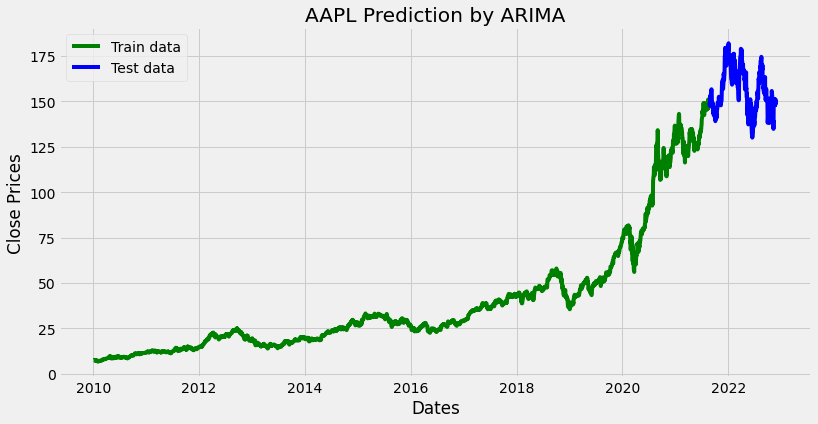

In [13]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
title_arima = ticker+ ' Stock Price Prediction by ARIMA'
plt.title(title_arima)
plt.plot(train_data['close'], 'green', label='Train data')
plt.plot(test_data['close'], 'blue', label='Test data')
plt.legend()

In [ ]:
#train_data

#ARIMA (Autoregressive integrated moving average) Model

In [14]:
train_arima = train_data['avg']
test_arima = test_data['close']

In [15]:
train_arima

Date
2010-01-04      7.622857
2010-01-05      7.657857
2010-01-06      7.606786
2010-01-07      7.518750
2010-01-08      7.518929
                 ...    
2021-08-16    148.830002
2021-08-17    150.384995
2021-08-18    148.434998
2021-08-19    146.250000
2021-08-20    147.639999
Name: avg, Length: 2929, dtype: float64

In [16]:
history = [x for x in train_arima]
y = test_arima
# make first prediction
predictions = list()
model = ARIMA(history, order=(1,1,0))
model_fit = model.fit(disp=0)
yhat = model_fit.forecast()[0]
predictions.append(yhat)
history.append(y[0])
# rolling forecasts
for i in range(1, len(y)):
    # predict
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    # invert transformed prediction
    predictions.append(yhat)
    # observation
    obs = y[i]
    history.append(obs)
# report performance
mse = mean_squared_error(y, predictions)
print('Mean Squared Error(MSE): '+str(mse))
mae = mean_absolute_error(y, predictions)
print('Mean Absolute Error(MAE): '+str(mae))
rmse = math.sqrt(mean_squared_error(y, predictions))
print('Root mean square error(RMSE): '+str(rmse))
accuracy = r2_score(y, predictions)
print('Accuracy:'+str(accuracy))

MSE: 10.057909745998103
MAE: 2.3915077852711124
RMSE: 3.1714207771908955
Accuracy:0.931307660824223


In [48]:
df_pred = pd.DataFrame(test_data.index)
df_pred['predictions'] = predictions
df_pred.tail(10)

,Date,predictions
316,2022-11-22,[147.88114742774158]
317,2022-11-23,[150.33094322976436]
318,2022-11-25,[151.15702823957992]
319,2022-11-27,[148.0026673375544]
320,2022-11-28,[148.15108759739627]
321,2022-11-29,[148.15107494631718]
322,2022-11-30,[148.15106229769725]
323,2022-12-01,[148.1510496526276]
324,2022-12-02,[148.1510369980088]
325,2022-12-03,[148.15102438606812]


In [49]:
#filtering the forecasted stock price for the next 7 future days
arima_forecast_df = df_pred.loc[(df_pred['Date'] >= first_forecast_date.date())]

In [50]:
arima_forecast_df = arima_forecast_df.set_index('Date')

In [51]:
arima_forecast_df

,predictions
Date,
2022-11-27,[148.0026673375544]
2022-11-28,[148.15108759739627]
2022-11-29,[148.15107494631718]
2022-11-30,[148.15106229769725]
2022-12-01,[148.1510496526276]
2022-12-02,[148.1510369980088]
2022-12-03,[148.15102438606812]


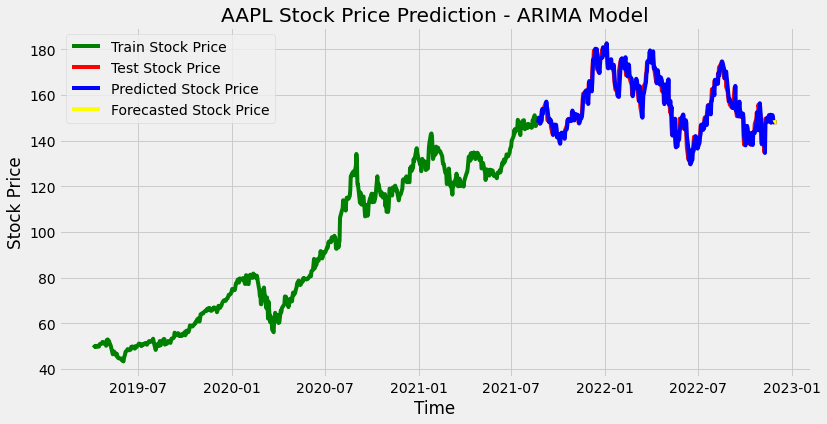

In [58]:
plt.figure(figsize=(12,6))
plt.plot(train_data.index[-600:], train_data['close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Test Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.plot(arima_forecast_df['predictions'], color='Yellow', label = 'Forecasted Stock Price')
title_arima = ticker+ ' Stock Price Prediction - ARIMA Model'
plt.title(title_arima)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_train_test_pred_forecast.png')
plt.show()

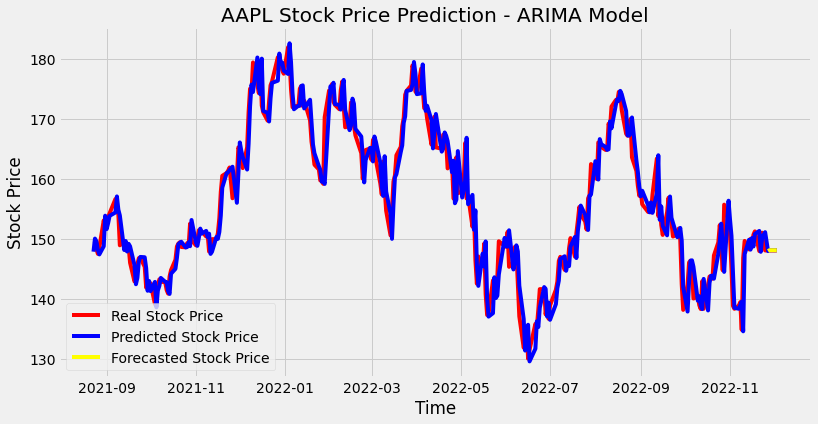

In [54]:
# Visualising the results
plt.figure(figsize=(12,6))
#plt.plot(train_data.index[-600:], train_data['close'].tail(600), color='green', label = 'Train Stock Price')
plt.plot(test_data.index, y, color = 'red', label = 'Test Stock Price')
plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
plt.plot(arima_forecast_df['predictions'], color='Yellow', label = 'Forecasted Stock Price')
title_arima = ticker+ ' Stock Price Prediction - ARIMA Model'
plt.title(title_arima)
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.savefig('arima_test_pred_forecast.png')
plt.show()

In [56]:
#R2 score
print("R2 score for ARIMA Model : %.2f" % r2_score(y,predictions))

R2 score for ARIMA Model : 0.93


In [57]:
print("Tomorrow's predicted stock price = $", float(predictions[-7]))

Tomorrow's predicted stock price = $ 148.0026673375544


# Function - ARIMA Model

In [85]:
def ARIMA_model(df_arima):
    ## Add a dummy row at the end. This will not be used to predict. 
    useast = datetime.now(pytz.timezone('America/New_York'))
    useast = useast.strftime('%Y-%m-%d')
    useast = datetime.strptime(useast, '%Y-%m-%d')
    first_forecast_date = useast +timedelta(1)
    
    #loop to add seven rows of dummy data
    for i in range(7):
        df_arima.loc[len(df_arima)]=df_arima.loc[len(df_arima)-1]
        next_day = useast +timedelta(i+1)
        df_arima.iloc[-1, df_arima.columns.get_loc('Date')] = next_day
        df_arima['Date'] = pd.to_datetime(df_arima["Date"], utc=True).dt.date

    df_arima = df_arima.set_index('Date')
    df_arima['avg'] = (df_arima['high'] + df_arima['low']) / 2

    train_data, test_data = df_arima[0:int(len(df_arima)*0.8)], df_arima[int(len(df_arima)*0.8):]
       
    plt.figure(figsize=(12,6))
    plt.grid(True)
    plt.xlabel('Dates')
    plt.ylabel('Close Prices')
    title_arima = ticker+ ' Stock Price Prediction by ARIMA'
    plt.title(title_arima)
    plt.plot(train_data['close'], 'green', label='Train data')
    plt.plot(test_data['close'], 'blue', label='Test data')
    plt.legend()
    plt.savefig('arima_train_test.png')
    plt.show()
        
    train_arima = train_data['avg']
    test_arima = test_data['close']
    history = [x for x in train_arima]
    y = test_arima
    # make first prediction
    predictions = list()
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit(disp=0)
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    history.append(y[0])
    # rolling forecasts
    for i in range(1, len(y)):
        # predict
        model = ARIMA(history, order=(1,1,0))
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        # invert transformed prediction
        predictions.append(yhat)
        # observation
        obs = y[i]
        history.append(obs)

    # report performance
    print("--------------------------------------------------------------------")
    mse = mean_squared_error(y, predictions)
    print('Mean Squared Error(MSE): '+str(mse))
    mae = mean_absolute_error(y, predictions)
    print('Mean Absolute Error(MAE): '+str(mae))
    rmse = math.sqrt(mean_squared_error(y, predictions))
    print('Root mean square error(RMSE): '+str(rmse))
    accuracy = r2_score(y, predictions)
    print('Accuracy:'+str(accuracy))
    
    df_pred = pd.DataFrame(test_data.index)
    df_pred['predictions'] = predictions
    
    #filtering the forecasted stock price for the next 7 future days
    arima_forecast_df = df_pred.loc[(df_pred['Date'] >= first_forecast_date.date())]
    arima_forecast_df = arima_forecast_df.set_index('Date')

    print("--------------------------------------------------------------------")
    plt.figure(figsize=(12,6))
    plt.plot(train_data.index[-600:], train_data['close'].tail(600), color='green', label = 'Train Stock Price')
    plt.plot(test_data.index, y, color = 'red', label = 'Test Stock Price')
    plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
    plt.plot(arima_forecast_df['predictions'], color='Yellow', label = 'Forecasted Stock Price')
    title_arima = ticker+ ' Stock Price Prediction - ARIMA Model'
    plt.title(title_arima)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('arima_train_test_pred_forecast.png')
    plt.show()
    print("--------------------------------------------------------------------")
    
    # Visualising the results
    plt.figure(figsize=(12,6))
    #plt.plot(train_data.index[-600:], train_data['close'].tail(600), color='green', label = 'Train Stock Price')
    plt.plot(test_data.index, y, color = 'red', label = 'Test Stock Price')
    plt.plot(test_data.index, predictions, color = 'blue', label = 'Predicted Stock Price')
    plt.plot(arima_forecast_df['predictions'], color='Yellow', label = 'Forecasted Stock Price')
    title_arima = ticker+ ' Stock Price Prediction - ARIMA Model'
    plt.title(title_arima)
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.grid(True)
    plt.savefig('arima_test_pred_forecast.png')
    plt.show()
    print("--------------------------------------------------------------------")
    return df_pred, arima_forecast_df           
        


In [86]:
quote = "AAPL"
df_stock_dtl = get_historical(quote)
df_stock_dtl

[*********************100%***********************]  1 of 1 completed


,Date,open,high,low,close,adjclose,volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.515213,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526478,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422663,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453413,447610800
...,...,...,...,...,...,...,...
3243,2022-11-18,152.309998,152.699997,149.970001,151.289993,151.289993,74794600
3244,2022-11-21,150.160004,150.369995,147.720001,148.009995,148.009995,58724100
3245,2022-11-22,148.130005,150.419998,146.929993,150.179993,150.179993,51804100
3246,2022-11-23,149.449997,151.830002,149.339996,151.070007,151.070007,58301400


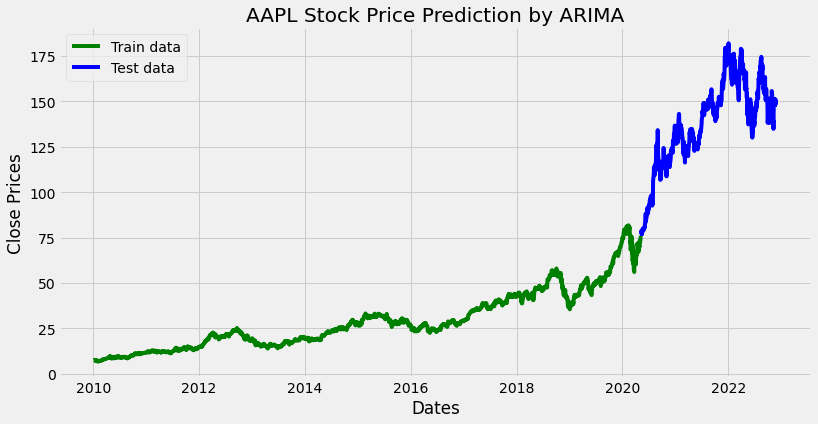

--------------------------------------------------------------------
Mean Squared Error(MSE): 7.870795837037558
Mean Absolute Error(MAE): 2.081964621474849
Root mean square error(RMSE): 2.8054938668686407
Accuracy:0.9859832494965869
--------------------------------------------------------------------


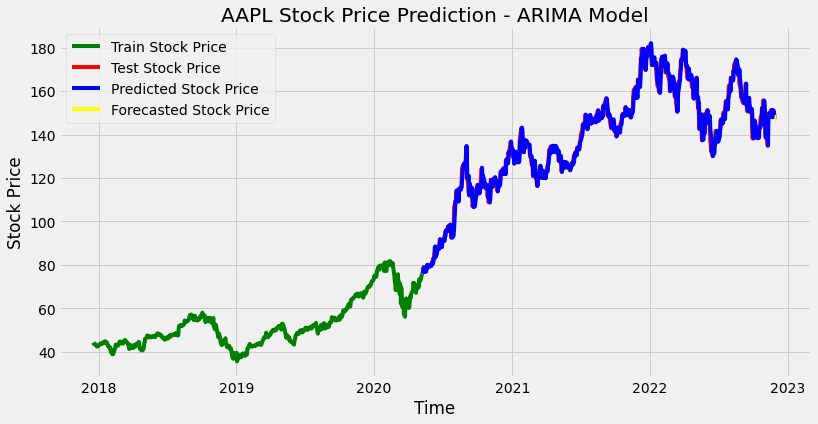

--------------------------------------------------------------------


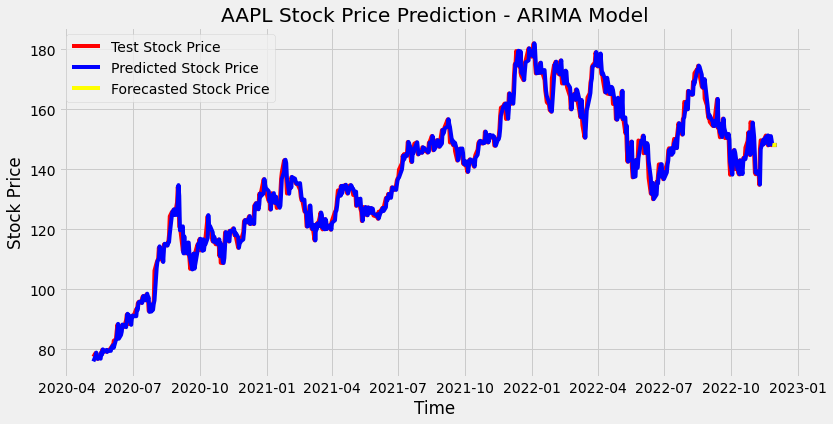

--------------------------------------------------------------------


In [87]:
df_arima_pred = pd.DataFrame()
df_arima_forecast = pd.DataFrame()

df_arima_pred, df_arima_forecast = ARIMA_model(df_stock_dtl)

In [62]:
df_arima_pred

,Date,predictions
0,2021-08-23,[147.9037775951334]
1,2021-08-24,[150.0861888251873]
2,2021-08-25,[149.64607568301932]
3,2021-08-26,[148.1964867148877]
4,2021-08-27,[147.44701997565934]
...,...,...
321,2022-11-29,[148.15107494631718]
322,2022-11-30,[148.15106229769725]
323,2022-12-01,[148.1510496526276]
324,2022-12-02,[148.1510369980088]


In [63]:
df_arima_forecast

,predictions
Date,
2022-11-27,[148.0026673375544]
2022-11-28,[148.15108759739627]
2022-11-29,[148.15107494631718]
2022-11-30,[148.15106229769725]
2022-12-01,[148.1510496526276]
2022-12-02,[148.1510369980088]
2022-12-03,[148.15102438606812]
